# Análisis de Modelos de Pronóstico de Contaminantes


### Métricas de Valoración
Para medir el desempeño de un modelo de pronóstico es importante contar con una o varias métrica de desempeño.

Medir el desempeño del pronóstico es importante para saber que los métodos y características con los que trabaja el pronóstico son los adecuados. Calcular el desempeño de los modelos nos ayudará en la búsqueda de partes del pronóstico que no trabajen de manera óptima y con esto tomar decisiones para mejorar el desempeño del mismo.

Las principales métricas usadas para medir el desempeño del modelo son el **RMSE** que nos indica qué tanto se aleja la predicción del valor real, la **R2** que determina la calidad del modelo para replicar los resultados y la proporción de variación de los resultados que puede explicarse por el modelo y la **precisión** que nos indica cuántos falsos positivos genera el modelo es decir, cuántas contingencias son pronosticadas incorrectamente por cada contingencia pronosticada correctamente.


__Pasos y descripción general del notebook__


- __Datos recibidos:__ Limpieza de datos inicial
- __Responsable:__ Daniel Bustillos
- __Contacto:__  juandaniel.bucam@gmail.com


---

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib as mpb
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

Funciones para obtener el pronóstico y para verificar si las contingenicias son pronosticadas correctamente

In [2]:
def predictor_meanO3(model0_1,modelo_2,X_set):
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

In [3]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        
        if  forecast[i] < 140:
            forecast_mean[i] = forecast[i]
            
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
            
        if  150 < forecast_q[i] < 160 and 130 < forecast[i] < 160:
            forecast_mean[i] = (0.1*forecast_q[i] + 0.9*forecast[i])
            
        if  150 < forecast_q[i] < 160 and 130 < forecast[i] < 160:
            forecast_mean[i] = forecast[i] 
            
        if  150 < forecast_q[i] < 160 and 140 < forecast[i] < 160:
            forecast_mean[i] = ((forecast_q[i] + forecast[i])/2)
            
    return forecast_mean

In [4]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 140:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
            
        if  150 < forecast_q[i] < 155 and 130 < forecast[i] < 160:
            forecast_mean[i] = (0.2*forecast_q[i] + 0.6*forecast[i])
            
        if  150 < forecast_q[i] < 160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
            
    return forecast_mean

Grafica Pronosticado-GroundTrue

In [5]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

## Importamos los modelos:

In [6]:
model_PM10 = [0 for col in range(25)]
modelq_PM10 = [0 for col in range(25)]
path = "/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/entrenamiento_sin_persistencia/modelos/PM10"
for i in range(0,24):
    model_PM10[i] = joblib.load(str(path + "/PM10_" + str(i+1) + 'hora.pkl'))
    # modelq_PM10[i] = joblib.load(str('/home/paw/DanielBustillos/contaminación/pipeline-norberto/modelos/PM10/PM10_'+str(i+1)+'hora_quantile.pkl'))

[23:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [7]:
model_O3 = [0 for col in range(25)]
modelq_O3 = [0 for col in range(25)]
path = "/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/entrenamiento_sin_persistencia/modelos/O3"

for i in range(0,24):
    model_O3[i] = joblib.load(str(path + "/O3_" + str(i+1) + 'hora.pkl'))
    # modelq_O3[i] = joblib.load(str('/home/paw/DanielBustillos/contaminación/pipeline-norberto/modelos/O3/O3_'+str(i+1)+'hora_quantile.pkl'))

[23:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Leemos los datos procesdos:

In [8]:
data_hour_merge = pd.read_csv("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/datos/datos_modelos_PM10mean.csv")
data_hour_merge.drop("fecha",axis=1,inplace=True)

In [9]:
data_hour_merge.head(2)

,PM10mean_0.0_mean,PM10mean_20.0_mean,PM10_8.0_mean,PM10mean_3.0_max,PM10mean_25.0_max,O3_max,PM10mean_18.0_mean,PM25mean_2.0_max,PM10mean_9.0_max,PM10_1.0_mean,...,PM10mean_max_frcst_14,PM10mean_max_frcst_15,PM10mean_max_frcst_16,PM10mean_max_frcst_17,PM10mean_max_frcst_18,PM10mean_max_frcst_19,PM10mean_max_frcst_20,PM10mean_max_frcst_21,PM10mean_max_frcst_22,PM10mean_max_frcst_23
0,21.750000,21.266667,17.8,30.583333,26.791667,28.0,20.616667,19.166667,28.541667,33.6,...,43.125000,50.500,50.708333,51.250000,52.375,52.666667,53.375000,54.250,54.75,55.125
1,21.216667,21.350000,17.6,29.583333,25.750000,21.0,20.991667,18.125000,28.375000,33.6,...,41.708333,43.125,50.500000,50.708333,51.250,52.375000,52.666667,53.375,54.25,54.750


## PM10

In [10]:
target = "PM10mean_max_frcst_"
conta = 'PM10mean'

In [11]:
lista = []
for i in range(1,25):
    lista.append(str(target+str(i)))

In [12]:
Xd = {}
yd = {}

y_traind = {}
y_testd = {}
X_traind = {}
X_testd = {}

for hora in range(1,25):
    dataset = data_hour_merge.copy()
    dataset.dropna(inplace=True)
    
    Xd[hora] = dataset.loc[:, dataset.columns != str(target+str(hora))]
    yd[hora] = dataset[str(target+str(hora))]
    
    Xd[hora].drop(lista[hora:],axis=1,inplace=True)
    if hora != 1:
        Xd[hora].drop(lista[:hora-1],axis=1,inplace=True)
    X_traind[hora], X_testd[hora], y_traind[hora], y_testd[hora] = train_test_split(Xd[hora], yd[hora], test_size=0.3, random_state=123)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
#hora = 1
dataset = data_hour_merge.copy()
dataset.dropna(inplace=True)
    
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]
    
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [14]:
pm10_pronos = pd.DataFrame(columns = lista)
PM10_score = pd.DataFrame(columns = lista)
rmse_PM10 = []
scores_pm10 = []

for i in range(0,24):
    
    print(i,"  " + target + str(i+1))
    
    scores_pm10.append( model_PM10[i].score(X, yd[i+1]) )
    
    # . predict_pm10 = predictor_mean(modelq_PM10[i],model_PM10[i],X)
    predict_pm10 = model_PM10[i].predict(X)

    
    # X[target + str(i+1)] = predict_pm10

    pm10_pronos[target + str(i+1)] = predict_pm10
    
    rmse_PM10.append(mean_squared_error( yd[i+1] , predict_pm10 ))
    

0   PM10mean_max_frcst_1
1   PM10mean_max_frcst_2
2   PM10mean_max_frcst_3
3   PM10mean_max_frcst_4
4   PM10mean_max_frcst_5
5   PM10mean_max_frcst_6
6   PM10mean_max_frcst_7
7   PM10mean_max_frcst_8
8   PM10mean_max_frcst_9
9   PM10mean_max_frcst_10
10   PM10mean_max_frcst_11
11   PM10mean_max_frcst_12
12   PM10mean_max_frcst_13
13   PM10mean_max_frcst_14
14   PM10mean_max_frcst_15
15   PM10mean_max_frcst_16
16   PM10mean_max_frcst_17
17   PM10mean_max_frcst_18
18   PM10mean_max_frcst_19
19   PM10mean_max_frcst_20
20   PM10mean_max_frcst_21
21   PM10mean_max_frcst_22
22   PM10mean_max_frcst_23
23   PM10mean_max_frcst_24


## O3

In [15]:
data_hour_merge_O3 = pd.read_csv("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/datos/datos_modelos_O3.csv")
data_hour_merge_O3.drop("fecha",axis=1,inplace=True)

In [16]:
targetO3 = "O3_max_frcst_"
contaO3 = 'O3'

In [17]:
listaO3 = []
for i in range(1,25):
    listaO3.append(str(targetO3+str(i)))

In [18]:
XO3d = {}
yO3d = {}

y_trainO3d = {}
y_testO3d = {}
X_trainO3d = {}
X_testO3d = {}

for hora in range(1,25):
    datasetO3d = data_hour_merge_O3.copy()
    datasetO3d.dropna(inplace=True)
    
    XO3d[hora] = datasetO3d.loc[:, datasetO3d.columns != str(targetO3+str(hora))]
    yO3d[hora] = datasetO3d[str(targetO3+str(hora))]
    
    XO3d[hora].drop(listaO3[hora:],axis=1,inplace=True)
    if hora != 1:
        XO3d[hora].drop(listaO3[:hora-1],axis=1,inplace=True)
    X_trainO3d[hora], X_testO3d[hora], y_trainO3d[hora], y_testO3d[hora] = train_test_split(XO3d[hora], yO3d[hora], test_size=0.3, random_state=123)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
datasetO3 = data_hour_merge_O3.copy()
datasetO3.dropna(inplace=True)
    
XO3 = datasetO3.loc[:, datasetO3.columns != str(targetO3 + str(hora))]
yO3 = datasetO3[str(targetO3 + str(hora))]
    
XO3.drop(listaO3[hora:],axis=1,inplace=True)
if hora != 1:
    XO3.drop(listaO3[:hora-1],axis=1,inplace=True)
# . X_trainO3, X_testO3, y_trainO3, y_testO3 = train_test_split(XO3, yO3, test_size=0.3, random_state=123)

## Predict

In [20]:
O3_pronos = pd.DataFrame(columns = listaO3)
scores_O3 = []
rmse_O3 = []

for i in range(0,24):
    
    print(i,"  " + targetO3 + str(i+1))
    
    scores_O3.append(model_O3[i].score(XO3, yO3d[i+1]))
    
    predict_O3 = model_O3[i].predict(XO3)
    
    #XO3[targetO3 + str(i+1)] = predict_O3
    
    O3_pronos[targetO3 + str(i+1)] = predict_O3
    
    rmse_O3.append(mean_squared_error( yO3d[i+1] , predict_O3 ))

0   O3_max_frcst_1
1   O3_max_frcst_2
2   O3_max_frcst_3
3   O3_max_frcst_4
4   O3_max_frcst_5
5   O3_max_frcst_6
6   O3_max_frcst_7
7   O3_max_frcst_8
8   O3_max_frcst_9
9   O3_max_frcst_10
10   O3_max_frcst_11
11   O3_max_frcst_12
12   O3_max_frcst_13
13   O3_max_frcst_14
14   O3_max_frcst_15
15   O3_max_frcst_16
16   O3_max_frcst_17
17   O3_max_frcst_18
18   O3_max_frcst_19
19   O3_max_frcst_20
20   O3_max_frcst_21
21   O3_max_frcst_22
22   O3_max_frcst_23
23   O3_max_frcst_24


## Graficamos

In [21]:
horas = [i for i in range(1,25)]

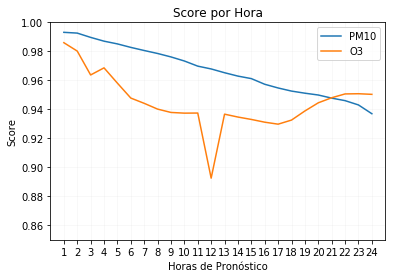

In [22]:
fig = plt.figure()
ax = fig.gca()

plt.plot(horas,scores_pm10,label = "PM10")
plt.plot(horas,scores_O3,label = "O3")
plt.xlabel("Horas de Pronóstico")
plt.ylabel("Score")
plt.title("Score por Hora")
plt.legend()
plt.xlim([0, 25])
plt.ylim([0.85, 1])
plt.xticks([i for i in range(1,25)])

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.1)
plt.savefig('/home/paw/DanielBustillos/contaminación/imagenes/scores.png', bbox_inches='tight',
            dpi=900)

plt.show()

## Error cuadrado

In [23]:
data_rsme = pd.read_csv("./score_RMSE_modelos.csv")

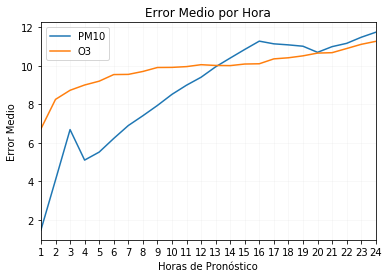

In [24]:
fig = plt.figure()
ax = fig.gca()

data_rsme.plot(x="hora", y=["PM10", "O3"],ax=ax)

plt.xlabel("Horas de Pronóstico")
plt.ylabel("Error Medio")
plt.title("Error Medio por Hora")
plt.legend()
#plt.xlim([0, 25])
#plt.ylim([0.85, 1])
plt.xticks([i for i in range(1,25)])

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.1)

plt.savefig('/home/paw/DanielBustillos/contaminación/imagenes/rsme.png', bbox_inches='tight'
            , dpi=900)

plt.show()

# Falsos positivos:

## O3

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
pm10_pronos.head(3)

,PM10mean_max_frcst_1,PM10mean_max_frcst_2,PM10mean_max_frcst_3,PM10mean_max_frcst_4,PM10mean_max_frcst_5,PM10mean_max_frcst_6,PM10mean_max_frcst_7,PM10mean_max_frcst_8,PM10mean_max_frcst_9,PM10mean_max_frcst_10,...,PM10mean_max_frcst_15,PM10mean_max_frcst_16,PM10mean_max_frcst_17,PM10mean_max_frcst_18,PM10mean_max_frcst_19,PM10mean_max_frcst_20,PM10mean_max_frcst_21,PM10mean_max_frcst_22,PM10mean_max_frcst_23,PM10mean_max_frcst_24
0,32.970364,33.902935,33.972755,34.828762,34.957767,39.286995,39.871628,39.969501,40.304714,40.914280,...,49.765869,50.398792,50.809216,51.250546,51.734905,52.850010,53.369762,53.844326,54.112259,44.335564
1,33.739738,33.798485,34.007843,34.121853,34.518833,35.245655,39.788494,40.144344,40.550976,40.428699,...,43.286800,50.399345,50.678528,51.120152,52.369747,52.686745,53.643776,54.203423,54.842285,45.959988
2,31.939667,33.332092,33.732113,34.001240,34.449371,34.513271,34.818417,39.847580,40.683876,40.753563,...,41.903389,43.348717,50.502735,50.778049,51.510811,52.495781,52.893627,53.639172,54.527435,46.969250


In [27]:
O3_pronos.head(4)

,O3_max_frcst_1,O3_max_frcst_2,O3_max_frcst_3,O3_max_frcst_4,O3_max_frcst_5,O3_max_frcst_6,O3_max_frcst_7,O3_max_frcst_8,O3_max_frcst_9,O3_max_frcst_10,...,O3_max_frcst_15,O3_max_frcst_16,O3_max_frcst_17,O3_max_frcst_18,O3_max_frcst_19,O3_max_frcst_20,O3_max_frcst_21,O3_max_frcst_22,O3_max_frcst_23,O3_max_frcst_24
0,40.470467,37.561108,32.991463,25.957788,23.156435,23.788973,26.243895,30.976175,34.462227,54.927860,...,92.228958,80.923119,68.667137,58.719723,50.596474,44.967464,43.182827,37.233974,34.226402,34.773052
1,42.218925,39.612675,35.364506,31.460979,27.851133,22.528196,22.781471,26.476444,30.881464,33.652271,...,88.488029,90.965660,80.478149,66.968834,57.903679,49.912395,43.359573,41.351562,35.126900,33.359985
2,43.082401,43.250523,36.190525,37.040329,31.100290,27.127731,23.703285,23.695259,26.885561,28.583004,...,86.109238,90.162483,90.050835,78.639473,66.359459,56.033291,48.976212,43.402592,40.737778,34.772705
3,51.167118,42.007729,40.181068,39.723339,36.454510,29.887787,25.941607,23.538786,24.613655,26.440367,...,74.986893,85.201981,90.593895,91.382301,81.791824,69.449600,58.628078,49.952007,42.999660,40.282104


In [28]:
O3_pronos.columns = ['O3_max_frcst_'+str(i) + 'f' for i in range(1,25)]
pm10_pronos.columns = ['PM10mean_max_frcst_'+ str(i)+'f' for i in range(1,25)]

In [29]:
data_hour_merge_O3f = data_hour_merge_O3[['O3_max_frcst_'+ str(i) for i in range(1,25)]]
data_hour_merge_pm10f = data_hour_merge[['PM10mean_max_frcst_'+str(i) for i in range(1,25)]]

In [30]:
matrix_O3 = pd.concat([data_hour_merge_O3f, O3_pronos], axis=1, sort=False)
matrix_pm10 = pd.concat([data_hour_merge_pm10f, pm10_pronos], axis=1, sort=False)

In [31]:
matrix_pm10[['PM10mean_max_frcst_24','PM10mean_max_frcst_24f']][matrix_pm10["PM10mean_max_frcst_24f"] > 150].head(3)

,PM10mean_max_frcst_24,PM10mean_max_frcst_24f
4322,152.500000,150.602417
4326,155.291667,150.433807
4328,153.291667,152.162170


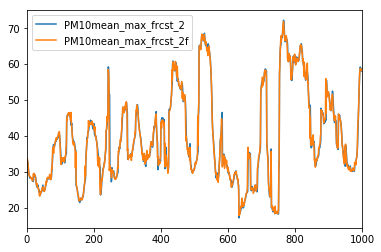

In [32]:
matrix_pm10[['PM10mean_max_frcst_2','PM10mean_max_frcst_2f']].head(1000).plot()

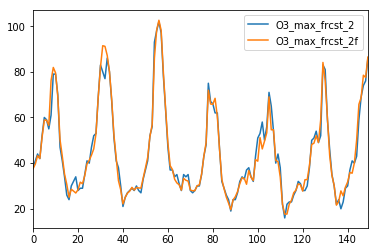

In [33]:
matrix_O3[["O3_max_frcst_2",'O3_max_frcst_2f']].head(150).plot()

In [34]:
for column in matrix_O3:
    matrix_O3[column] = matrix_O3[column].apply(lambda x: 1 if x > 140 else 0)
for column in matrix_pm10:
    matrix_pm10[column] = matrix_pm10[column].apply(lambda x: 1 if x > 171 else 0)

In [35]:
confussion_o3 = []
for i in range(0,24):
    confussion_o3.append(confusion_matrix(matrix_O3.iloc[:,i], matrix_O3.iloc[:,24+i]).ravel().tolist())
    
confussion_pm10 = []
for i in range(0,24):
    confussion_pm10.append(confusion_matrix(matrix_pm10.iloc[:,i], matrix_pm10.iloc[:,24+i]).ravel().tolist())

## Definimos un df para almacenar la matríz de confusión:

In [36]:
confussion_df = pd.DataFrame(confussion_o3)
confussion_df.reset_index(inplace=True)
confussion_df.columns = ['hora',"TN","FP","FN",'TP']
confussion_df["hora"] = confussion_df["hora"]+1

In [37]:
confussion_df_PM10 = pd.DataFrame(confussion_pm10)
confussion_df_PM10.reset_index(inplace=True)
confussion_df_PM10.columns = ['hora',"TN","FP","FN",'TP']
confussion_df_PM10["hora"] = confussion_df_PM10["hora"] + 1

### Exactitud y precisión:

In [38]:
confussion_df["Exactitud"] = (confussion_df.loc[:,"TN"] + confussion_df.loc[:,"TP"])/confussion_df.iloc[1,1:].sum()
confussion_df["Precisión"] = (confussion_df.loc[:,"TP"])/(confussion_df.loc[:,"FP"] + confussion_df.loc[:,"TP"])

In [39]:
confussion_df_PM10["Exactitud"] = (confussion_df_PM10.loc[:,"TN"] + confussion_df_PM10.loc[:,"TP"])/confussion_df_PM10.iloc[1,1:].sum()
confussion_df_PM10["Precisión"] = (confussion_df_PM10.loc[:,"TP"])/(confussion_df_PM10.loc[:,"FP"] + confussion_df_PM10.loc[:,"TP"])

In [40]:
confussion_df.tail()

,hora,TN,FP,FN,TP,Exactitud,Precisión
19,20,33331,10,92,207,0.996968,0.953917
20,21,33334,7,82,217,0.997354,0.968750
21,22,33333,8,68,231,0.997741,0.966527
22,23,33333,8,65,234,0.997830,0.966942
23,24,33339,3,87,211,0.997325,0.985981


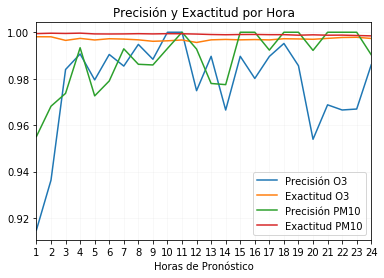

In [41]:
fig = plt.figure()
ax = fig.gca()

confussion_df.plot(x="hora", y=["Precisión"],ax=ax, label = ['Precisión O3'])
confussion_df.plot(x="hora", y=["Exactitud"],ax=ax,label = ['Exactitud O3'])

confussion_df_PM10.plot(x="hora", y=["Precisión"],ax=ax,label = ['Precisión PM10'])
confussion_df_PM10.plot(x="hora", y=["Exactitud"],ax=ax,label = ['Exactitud PM10'])

plt.xlabel("Horas de Pronóstico")
#plt.ylabel("Precisión y Exactitud por Hora")
plt.title("Precisión y Exactitud por Hora")
plt.legend()
#plt.xlim([0, 25])
#plt.ylim([0.85, 1])
plt.xticks([i for i in range(1,25)])

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.1)

plt.savefig('/home/paw/DanielBustillos/contaminación/imagenes/exactitud.png', bbox_inches='tight'
            , dpi=900)

plt.show()

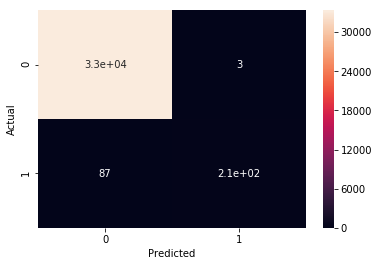

In [42]:
confusion_matrix_df = pd.crosstab(matrix_O3.iloc[:,23], matrix_O3.iloc[:,24+23], rownames=['Actual'],
                                  colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True)

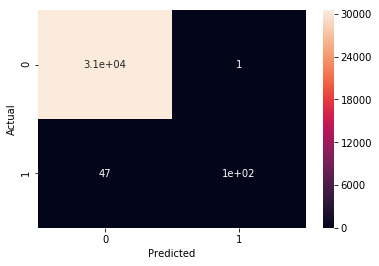

In [43]:
confusion_matrix_df = pd.crosstab(matrix_pm10.iloc[:,23], matrix_pm10.iloc[:,24+23], rownames=['Actual'],
                                  colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True)